# Stock Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina' # dogwhistling for 4K peeps
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

### Load Data

In [2]:
df=pd.read_csv("Company Stock and Investment.csv",parse_dates=['Date'],index_col='Date')

In [3]:
#unlagged data
uldf=pd.read_csv("Company Stock and Investment.csv")

### Data Pre-Processing

In [4]:
df.head() # show fisrt 5 rows of data frame

,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
Date,,,,
2009-12-31,0.025417,0.000150,0.017354,0.006848
2010-04-01,0.026830,0.001097,0.015565,-0.004609
2010-05-01,0.002699,0.001560,0.001729,0.005900
2010-06-01,0.021688,0.006009,-0.015906,-0.018116
2010-07-01,-0.006256,0.000221,-0.001849,-0.017013


In [5]:
df.shape #Shape of data

(1984, 4)

In [6]:
df.isnull().sum() #Check any null value

Oil Investments            0
Gold Investments           0
Comp Stock                 0
Other sharesInvestments    0
dtype: int64

In [7]:
df.info() # brief inforamtion about Dataset

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1984 entries, 2009-12-31 to 2017-11-15
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Oil Investments          1984 non-null   float64
 1   Gold Investments         1984 non-null   float64
 2   Comp Stock               1984 non-null   float64
 3   Other sharesInvestments  1984 non-null   float64
dtypes: float64(4)
memory usage: 77.5 KB


### Visualization

Text(0.5, 1, 'Heatmap using correlation matrix')

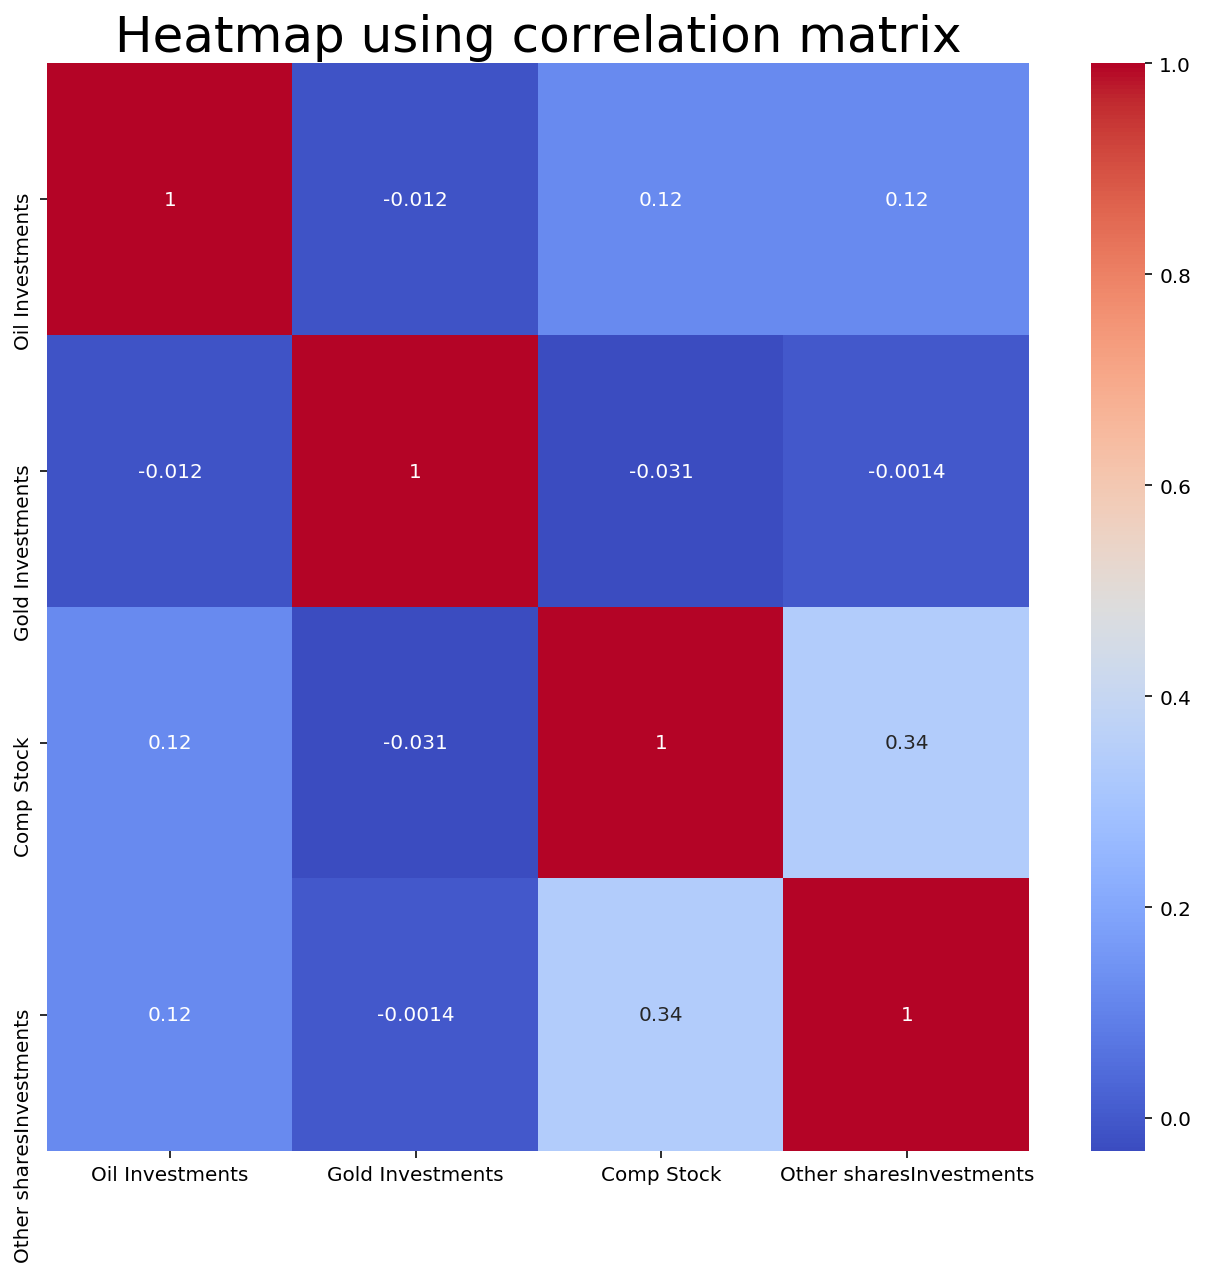

In [8]:
plt.figure(figsize=(11,10))
sns.heatmap(df.corr(), annot = True, cmap ='coolwarm') # show heatmap
plt.title("Heatmap using correlation matrix", fontsize = 25) # title of heatmap

## Splitting Data

In [9]:
#training
s1= uldf.iloc[0:1259]

In [10]:
#validate
s2= uldf.iloc[1259:1763]

In [11]:
#Test
s3=uldf.iloc[1511:]

## Project 3: Other SharesInvestments

In [12]:
dfg=df['Other sharesInvestments']

In [13]:
dfg.head()

Date
2009-12-31    0.006848
2010-04-01   -0.004609
2010-05-01    0.005900
2010-06-01   -0.018116
2010-07-01   -0.017013
Name: Other sharesInvestments, dtype: float64

(array([733408., 733773., 734138., 734503., 734869., 735234., 735599.,
        735964., 736330., 736695.]),
 <a list of 10 Text xticklabel objects>)

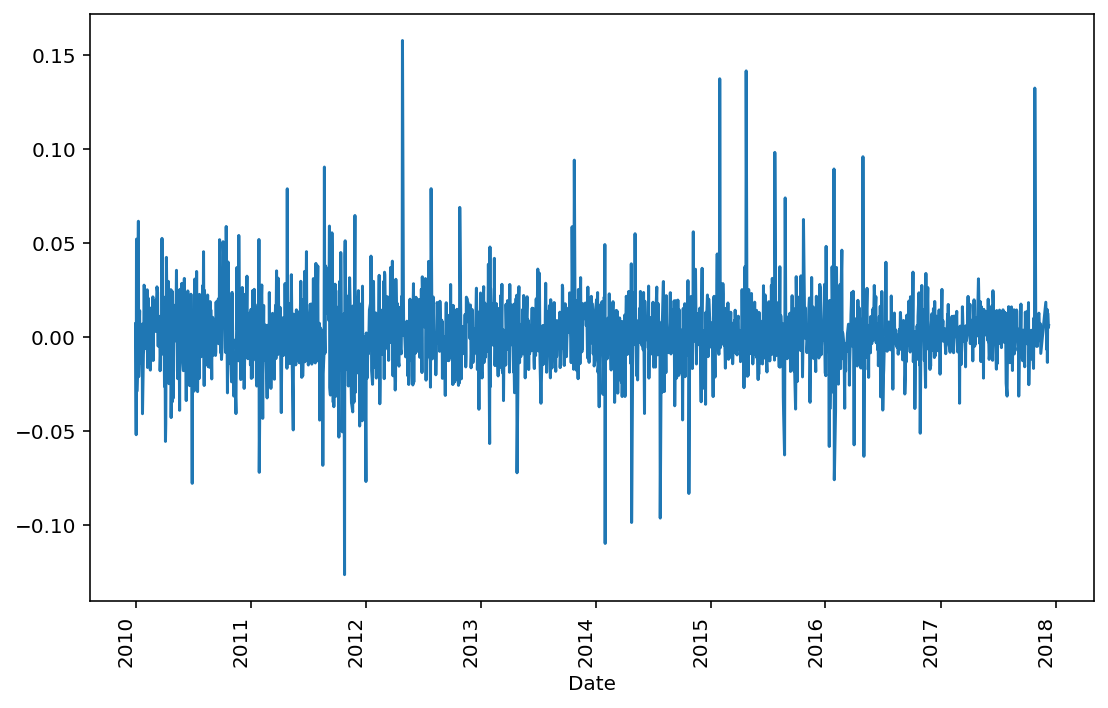

In [14]:
plt.figure(figsize=(9,6))
dfg.plot()
plt.xticks(rotation=90)

### Make and Check Stationarity of a Time Series Data

(array([733408., 733773., 734138., 734503., 734869., 735234., 735599.,
        735964., 736330., 736695.]),
 <a list of 10 Text xticklabel objects>)

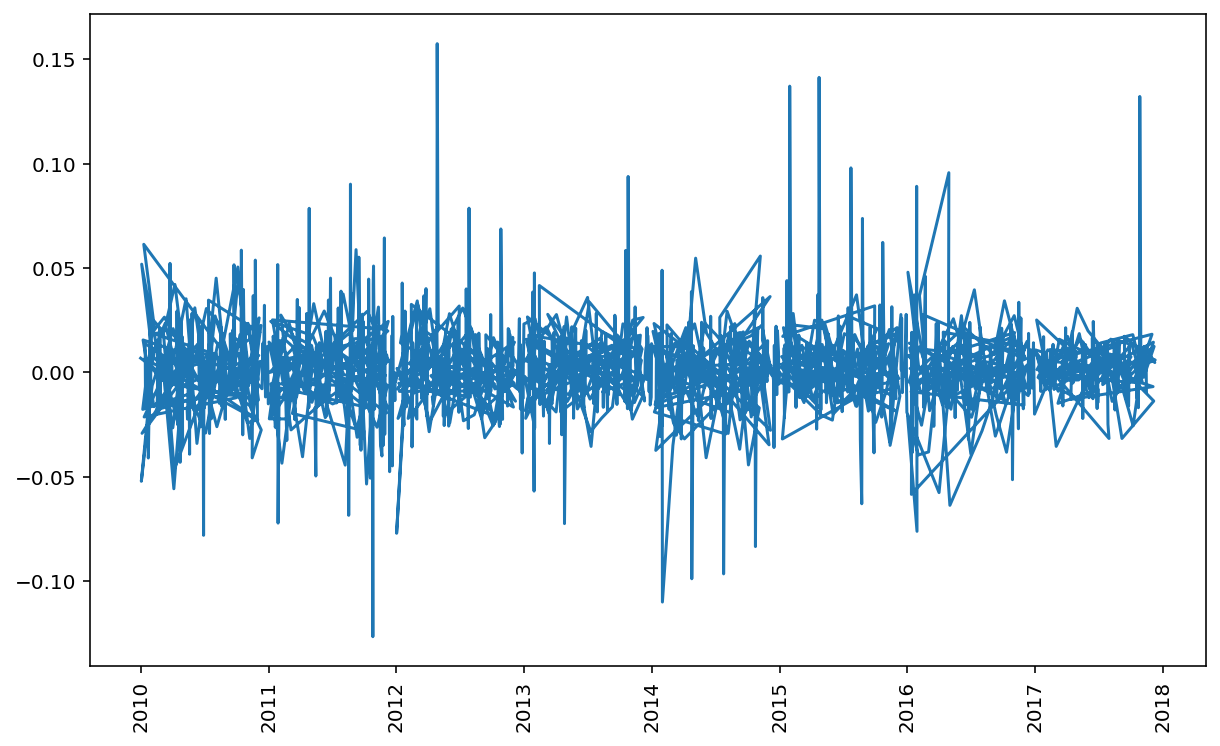

In [15]:
plt.figure(figsize=(10,6))
plt.plot(dfg)
plt.xticks(rotation=90)

In [16]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()
    #Plot rolling statistics:
    plt.figure(figsize=(16,9))
    plt.xticks(rotation=90)
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

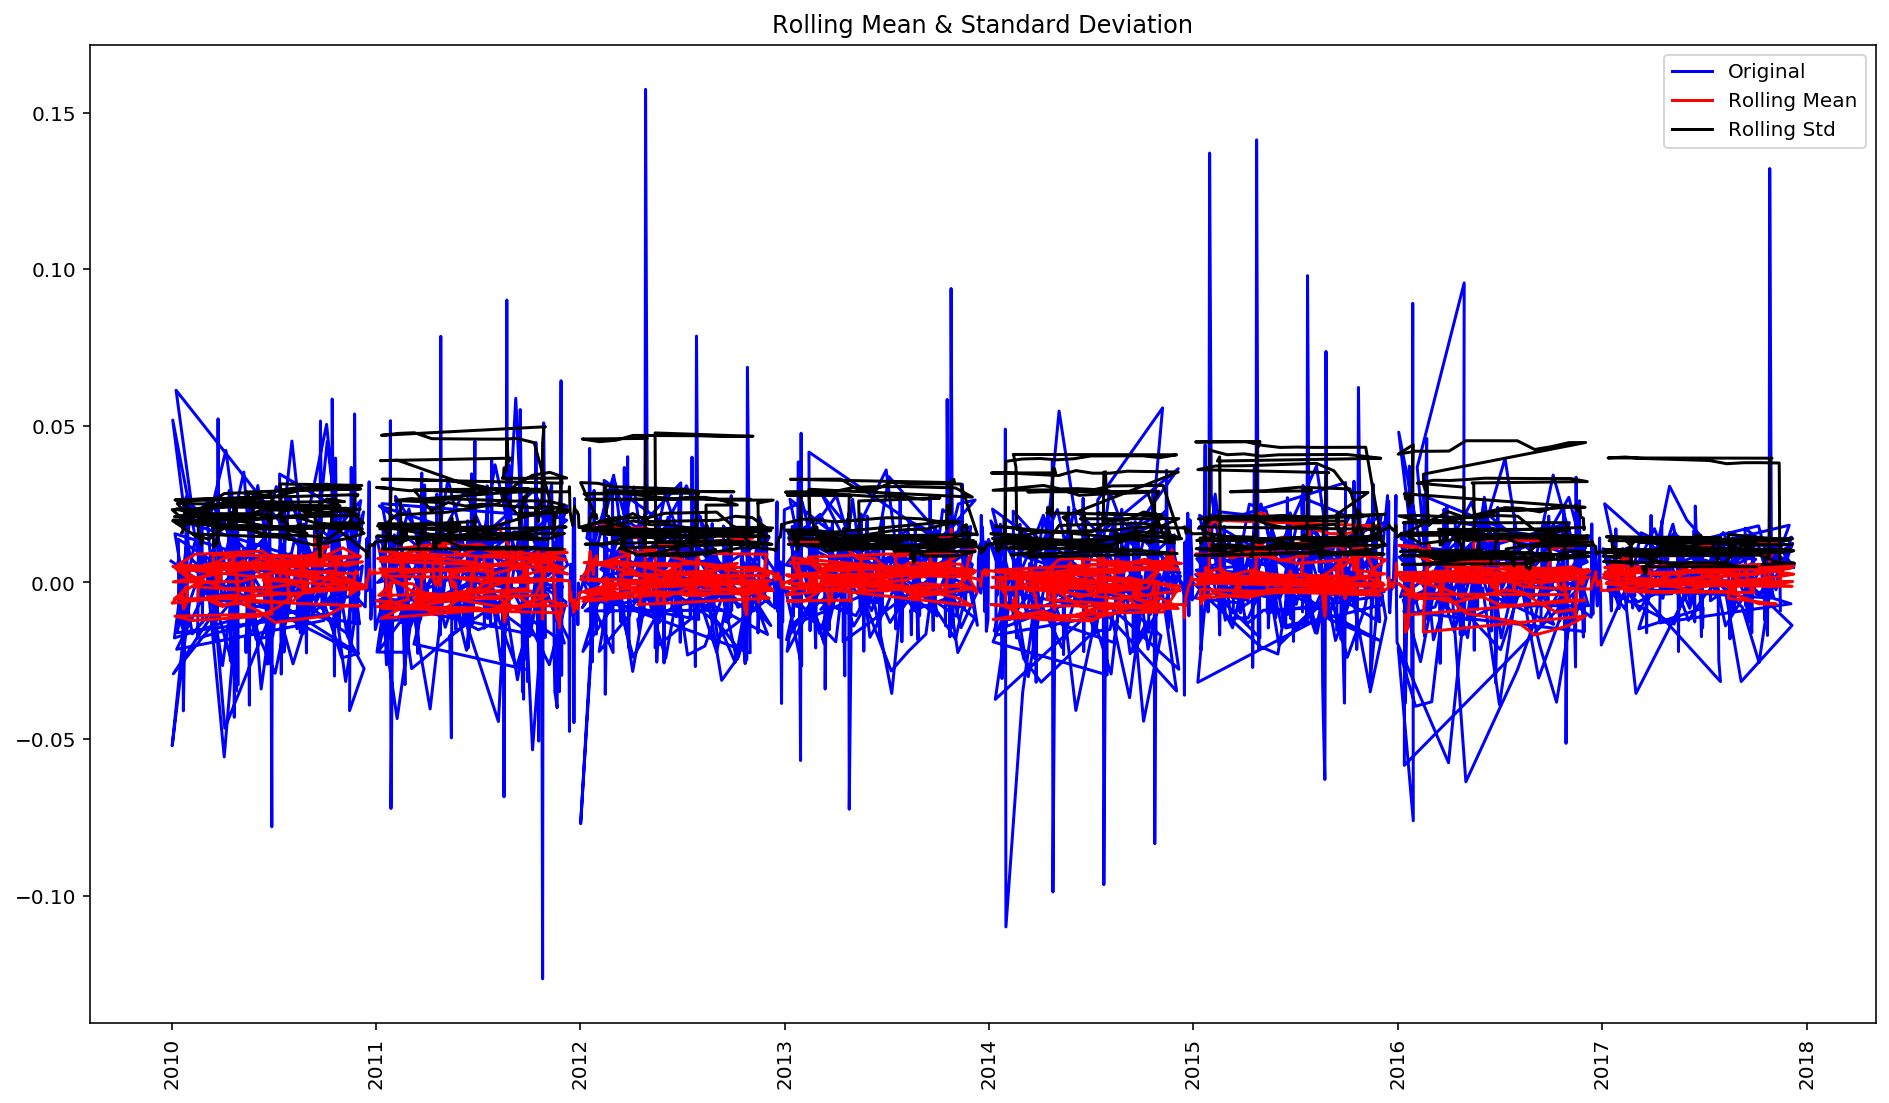

Results of Dickey-Fuller Test:
Test Statistic                  -44.848145
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1983.000000
Critical Value (1%)              -3.433652
Critical Value (5%)              -2.862999
Critical Value (10%)             -2.567547
dtype: float64


In [17]:
test_stationarity(dfg)

## Differencing

In [18]:
df['Oi First Difference'] = df['Other sharesInvestments'] - df['Other sharesInvestments'].shift(1)

In [19]:
df['Other sharesInvestments'].shift(1).head()

Date
2009-12-31         NaN
2010-04-01    0.006848
2010-05-01   -0.004609
2010-06-01    0.005900
2010-07-01   -0.018116
Name: Other sharesInvestments, dtype: float64

In [20]:
df['Seasonal First Difference']=df['Other sharesInvestments']-df['Other sharesInvestments'].shift(8) 

In [21]:
df['Seasonal First Difference']=df['Seasonal First Difference'].replace([np.inf, -np.inf], np.nan)
df['Seasonal First Difference'].dropna(inplace=True)

In [22]:
df['Seasonal First Difference']

Date
2010-01-13    0.006973
2010-01-14   -0.009023
2010-01-15   -0.007549
2010-01-19    0.021812
2010-01-20    0.002673
                ...   
2017-09-11   -0.012302
2017-10-11    0.001666
2017-11-13    0.004842
2017-11-14    0.015364
2017-11-15   -0.024812
Name: Seasonal First Difference, Length: 1976, dtype: float64

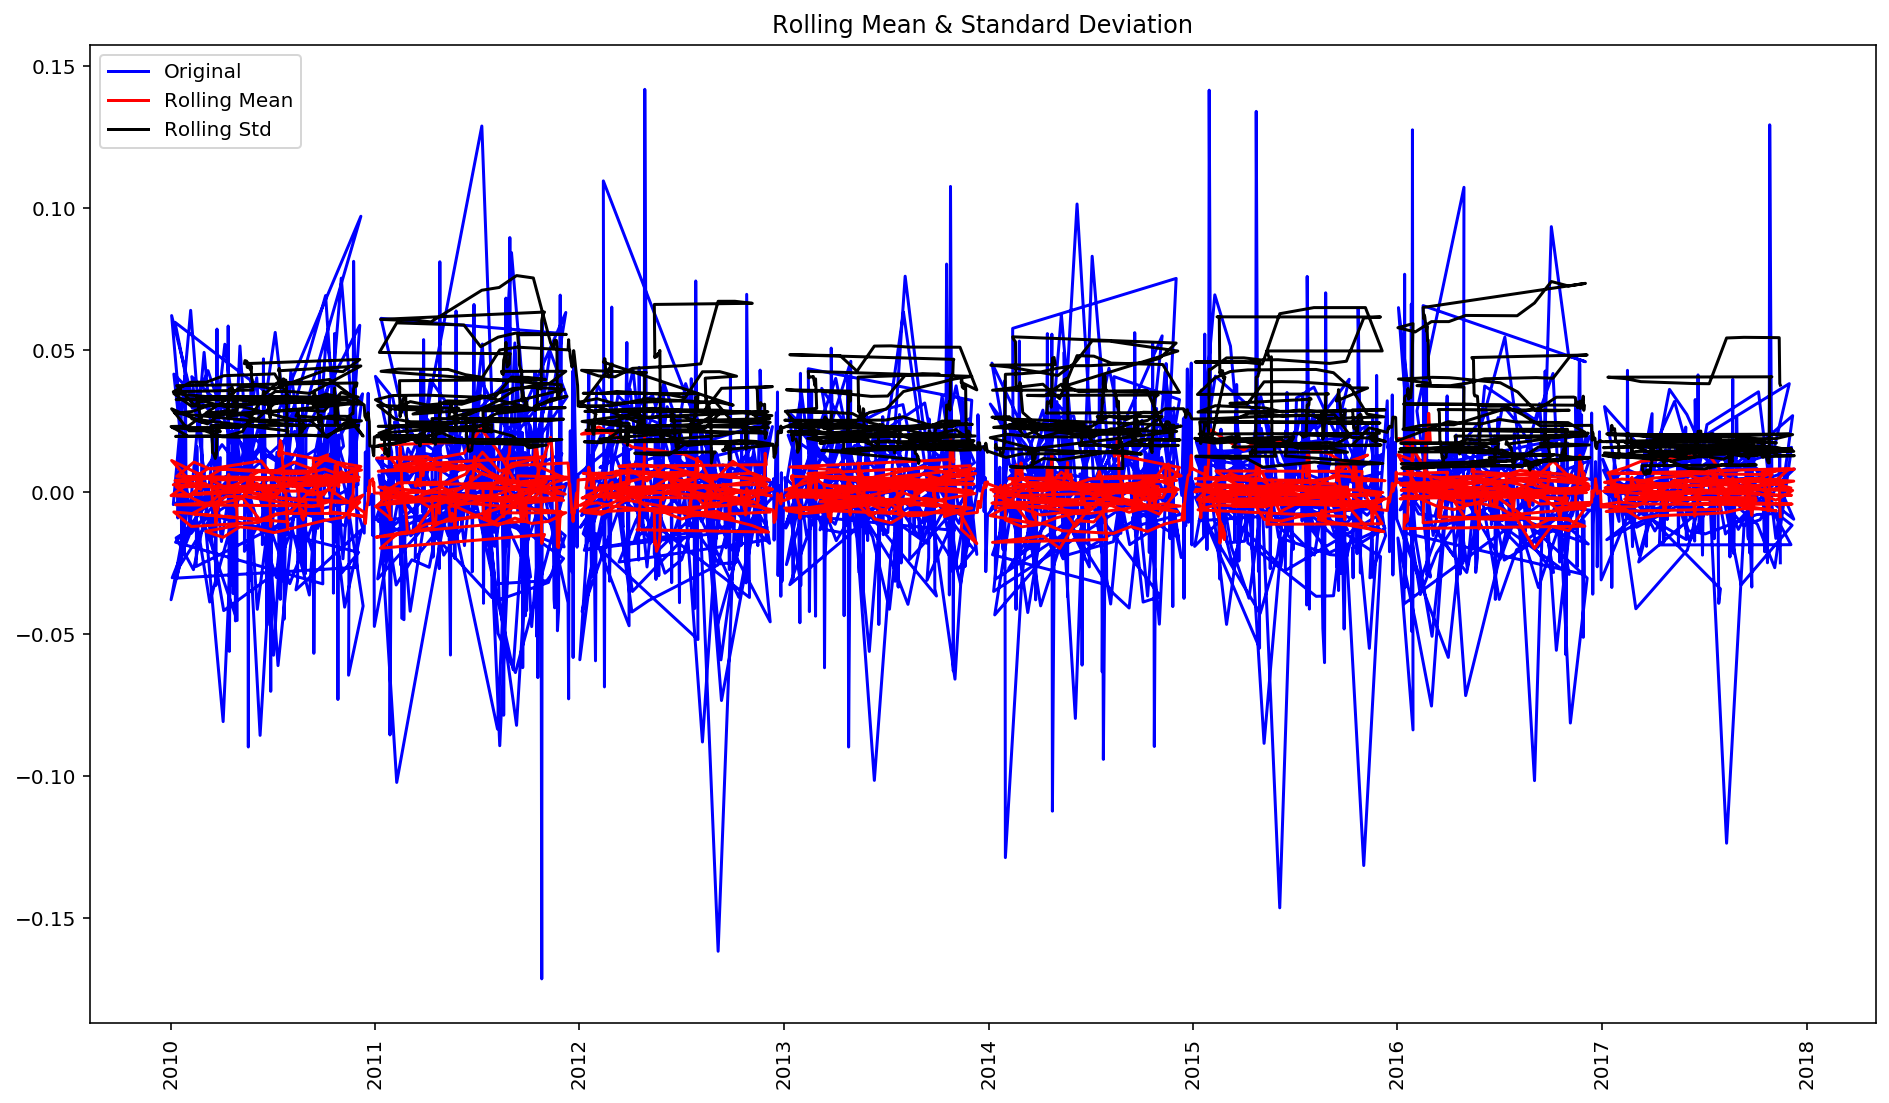

Results of Dickey-Fuller Test:
Test Statistic                -1.524813e+01
p-value                        5.053083e-28
#Lags Used                     2.300000e+01
Number of Observations Used    1.952000e+03
Critical Value (1%)           -3.433704e+00
Critical Value (5%)           -2.863022e+00
Critical Value (10%)          -2.567559e+00
dtype: float64


In [23]:
test_stationarity(df['Seasonal First Difference'])

### Forecasting a Time Series

In [24]:
#ACF and PACF plots:
ts_log = np.log(dfg)
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff =ts_log_diff.replace([np.inf, -np.inf], np.nan)
ts_log_diff=ts_log_diff.dropna()

from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

C:\Users\EMRKZ\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\EMRKZ\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


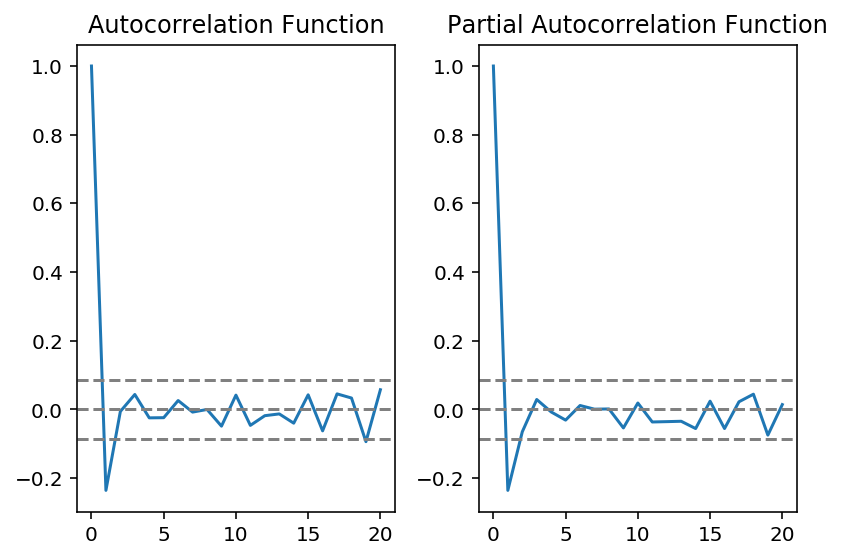

In [25]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

### ARIMA Model

In [43]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df['Other sharesInvestments'],order=(1,1,0)) # this order is p d q(0 or 1) 
model_fit=model.fit()
model_fit.summary()

C:\Users\EMRKZ\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\EMRKZ\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
C:\Users\EMRKZ\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\EMRKZ\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWar

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARIMA Model Results                                 
=====================================================================================
Dep. Variable:     D.Other sharesInvestments   No. Observations:                 1983
Model:                        ARIMA(1, 1, 0)   Log Likelihood                4549.068
Method:                              css-mle   S.D. of innovations              0.024
Date:                       Fri, 23 Oct 2020   AIC                          -9092.136
Time:                               13:31:39   BIC                          -9075.359
Sample:                                    1   HQIC                         -9085.973
                                                                                     
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -3.449e-06      0.000     -0.009      0.993      -0.001       0.001
ar.L1.D.Other sharesInvestments    -0.4908      0.020    -25.096      0.000      -0.529      -0.452
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.0375           +0.0000j            2.0375            0.5000
-----------------------------------------------------------------------------
"""

(array([733408., 733773., 734138., 734503., 734869., 735234., 735599.,
        735964., 736330., 736695.]),
 <a list of 10 Text xticklabel objects>)

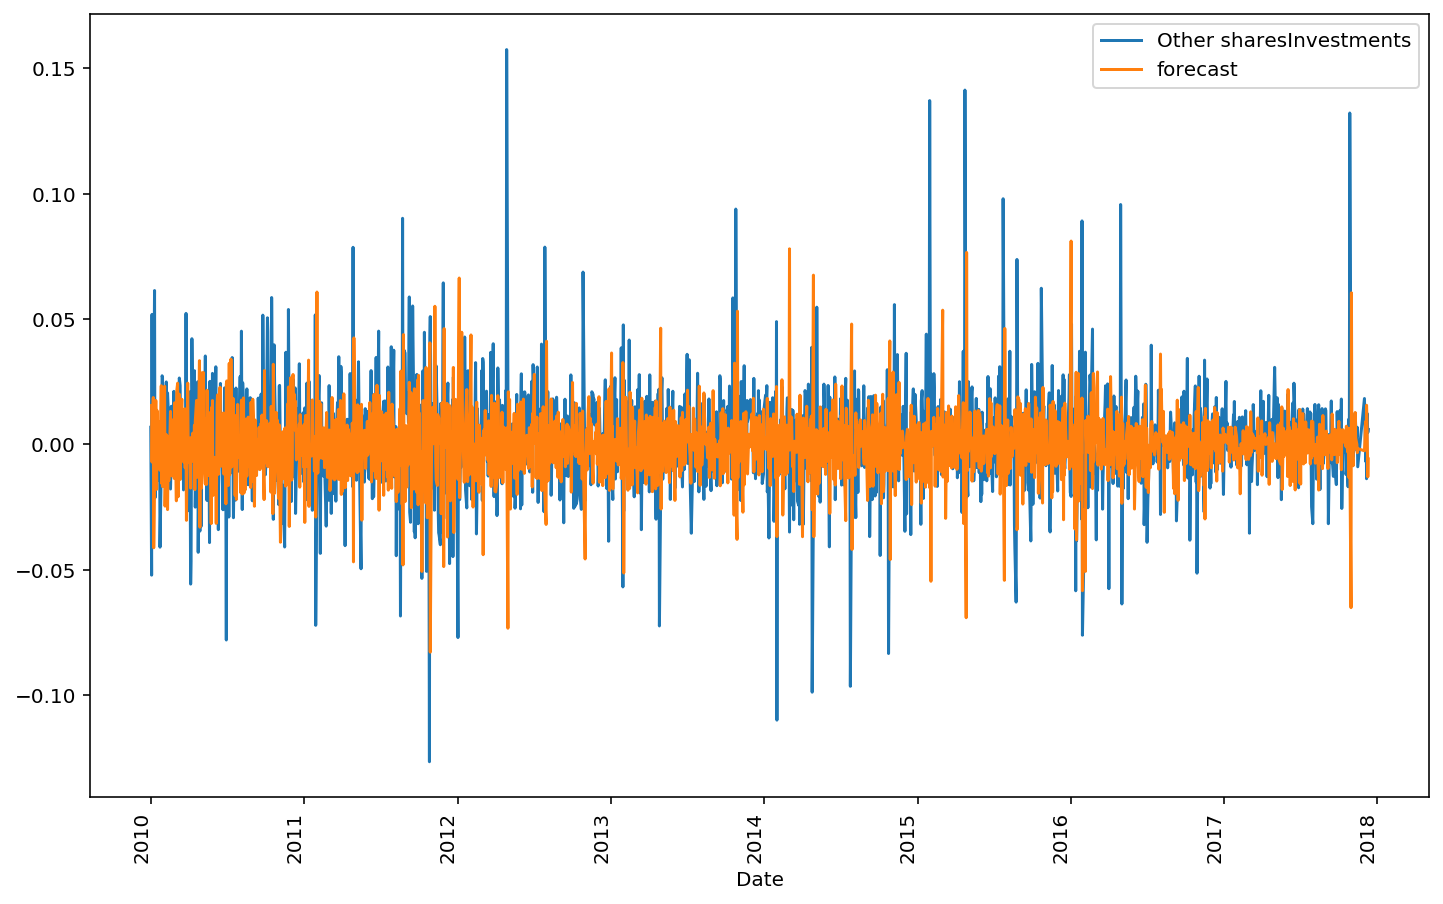

In [44]:
df['forecast']=model_fit.predict()
df[['Other sharesInvestments','forecast']].plot(figsize=(12,8))
plt.xticks(rotation=90)

## SARIMA Model

In [49]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Other sharesInvestments'],order=(1, 1, 0),seasonal_order=(1,1,1,12)) #(p,d,q,Shift)
results=model.fit()

C:\Users\EMRKZ\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\EMRKZ\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
C:\Users\EMRKZ\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\EMRKZ\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWar

(array([733408., 733773., 734138., 734503., 734869., 735234., 735599.,
        735964., 736330., 736695.]),
 <a list of 10 Text xticklabel objects>)

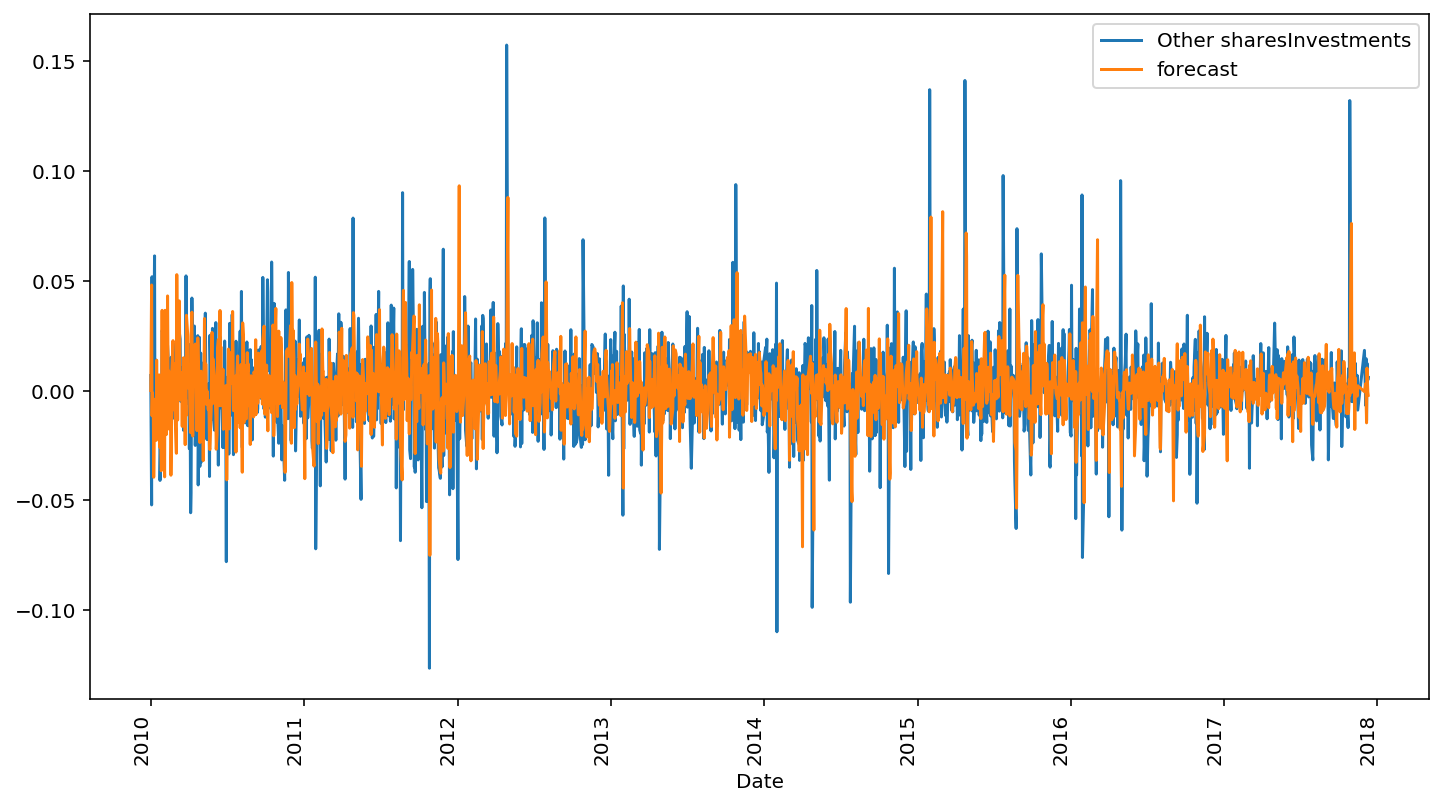

In [50]:
df['forecast']=results.predict()
df[['Other sharesInvestments','forecast']].plot(figsize=(12,7))
plt.xticks(rotation=90)

## Predicting for 2018 to 2021

In [51]:
from pandas.tseries.offsets import DateOffset
future_dates=[dfg.index[-1]+ DateOffset(years=x )for x in range(1,5)]

In [52]:
future_datest_df=pd.DataFrame(index=future_dates[0:])

In [53]:
future_df=pd.concat([df,future_datest_df])

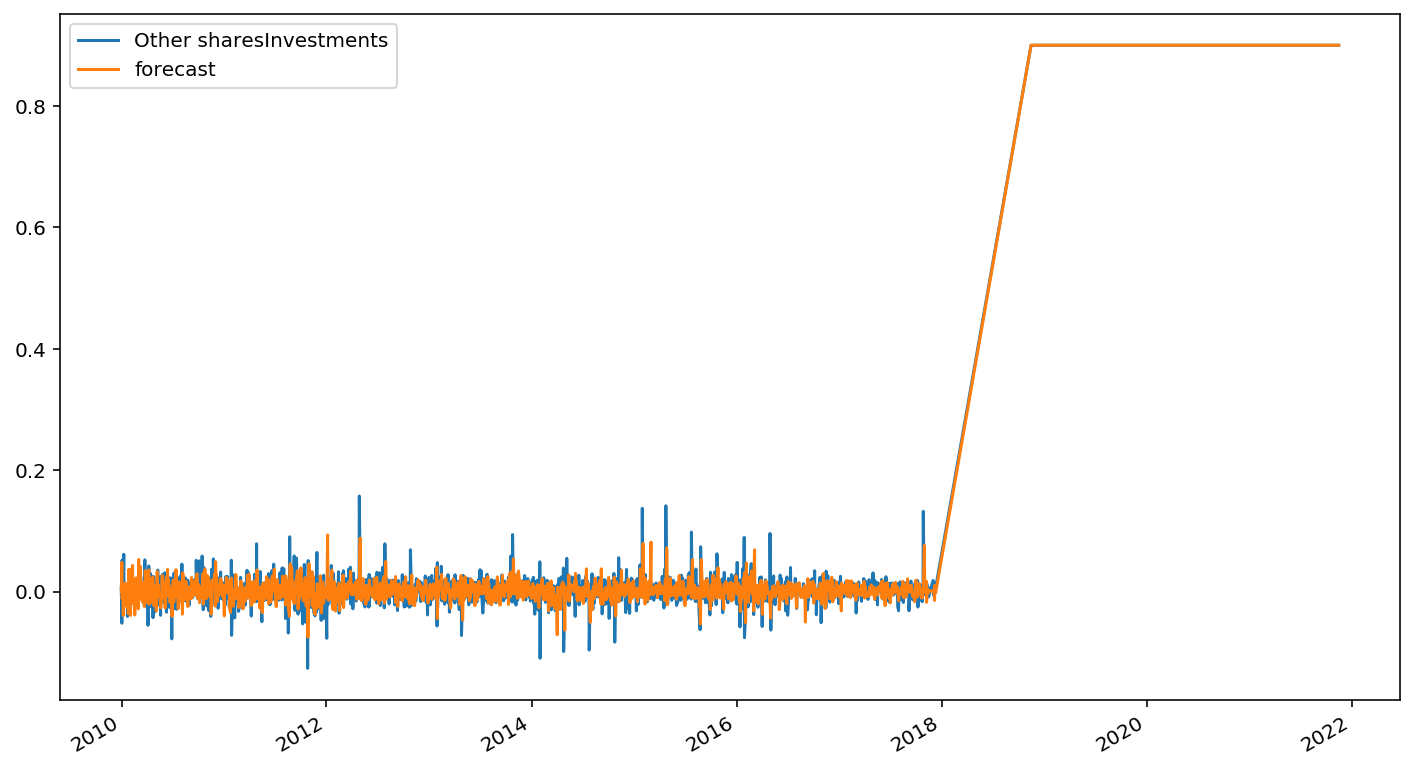

In [60]:
future_df=future_df.replace(np.nan,0.1)
future_df[['Other sharesInvestments','forecast']].plot(figsize=(12,7))